In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score
import xgboost as xgb

In [2]:
df = pd.read_csv('/content/USvideos.csv')
all_category = pd.read_json('/content/US_category_id.json')
for i in range(3):
  print(all_category['items'][i])

{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}
{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}


In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df.shape

(40949, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
df.fillna({'description': ''},inplace=True)
df.isna().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [8]:
# Reomve error videos
df = df[df['video_error_or_removed'] == False].copy()

# Identify rows with '#NAME?' video_id (missing video_id)
problem_rows = df[df['video_id'] == '#NAME?']

# Create a new identifier for these rows
new_ids = problem_rows.apply(lambda row: f"{row['title']}_{row['category_id']}", axis=1)

# Update the 'video_id' column for the problematic rows
df.loc[problem_rows.index, 'video_id'] = new_ids

# Feature engineering
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['trending_year'] = df['trending_date'].dt.year
df['trending_month'] = df['trending_date'].dt.month
df['trending_dayofweek'] = df['trending_date'].dt.dayofweek
df['publish_hour'] = df['publish_time'].dt.hour
df['time_takes_to_trending'] = df['trending_date'] - df['publish_time'] + pd.Timedelta(hours=12)
df['time_takes_to_trending'] = df['time_takes_to_trending'].apply(lambda x: max(x, pd.Timedelta(hours=12)))
df["time_cut"]=pd.cut(df["time_takes_to_trending"].dt.days,[-2,1,3,5,7,36500],labels=["0-1 days","1-3 days","3-5 days","5-7 days","7+ days"])
category_ids = {int(all_category['items'][i]['id']):all_category['items'][i]['snippet']['title'] for i in range(len(all_category))}
df.insert(5, 'category', df['category_id'].map(category_ids))

<ipython-input-9-162962082>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


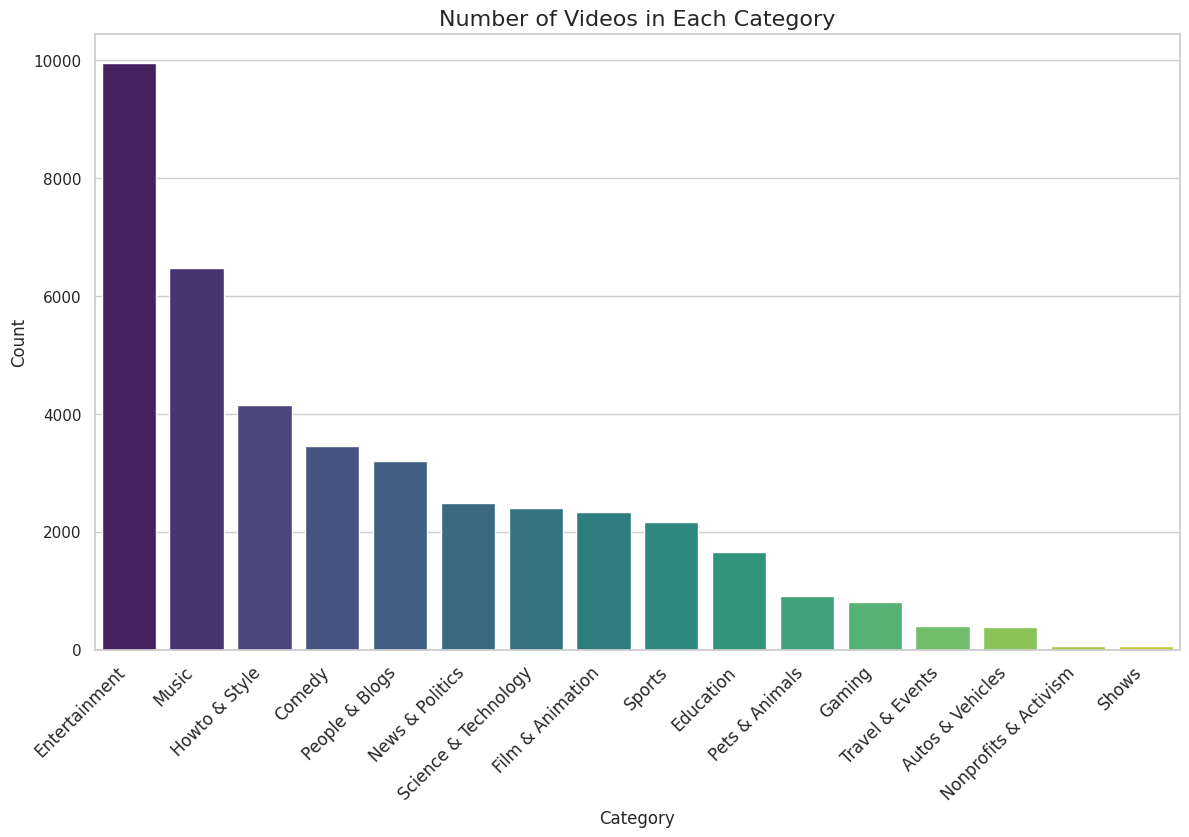

In [9]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 8))


# Plot the numebr of videos in each category
sns.countplot(
    data=df,
    x='category',
    order=df['category'].value_counts().index,
    palette='viridis'
)

plt.xticks(
    rotation=45,
    ha='right',
    fontsize=12
)

plt.title('Number of Videos in Each Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

<Figure size 1600x900 with 0 Axes>

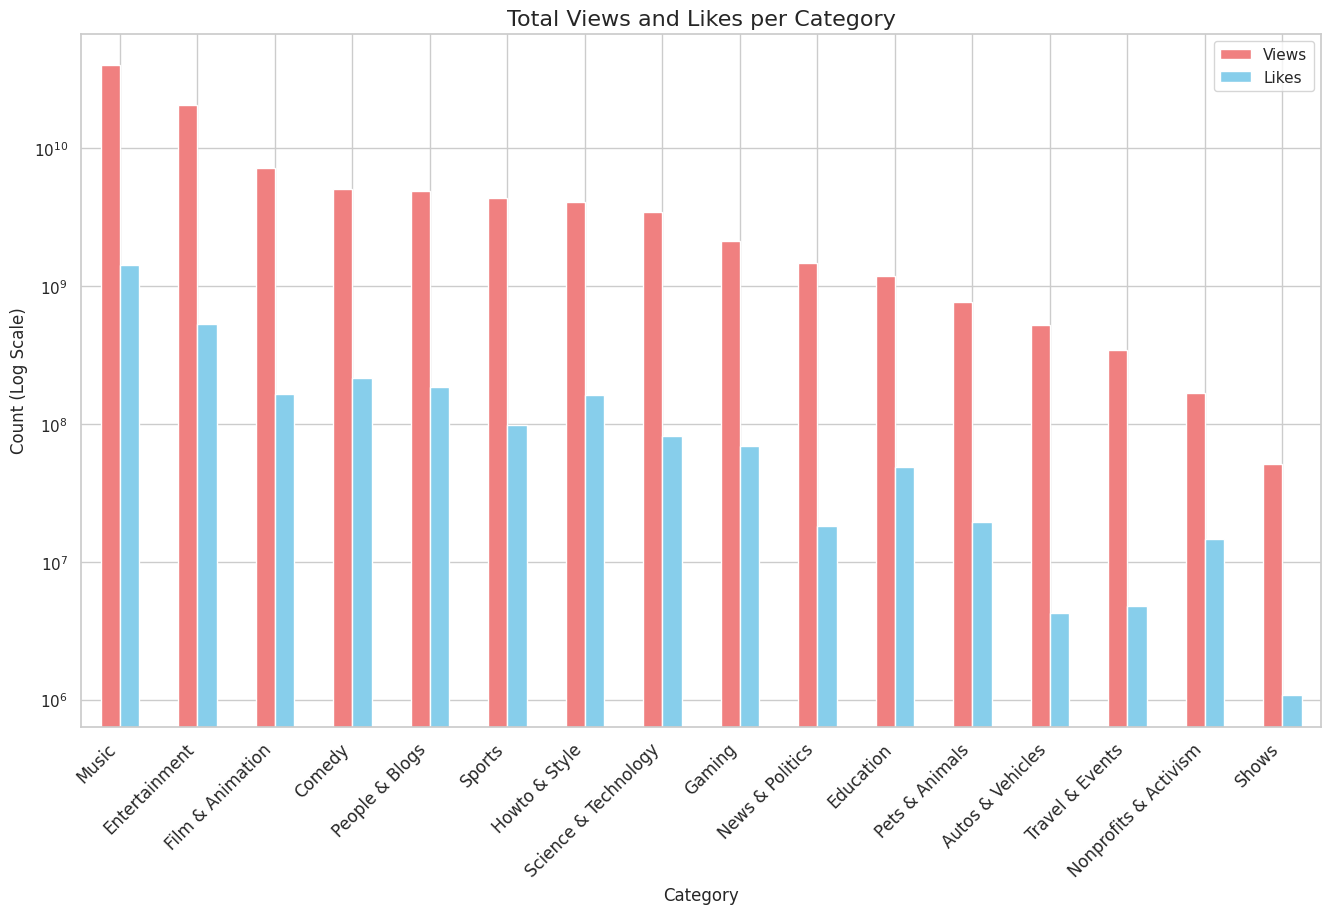

In [10]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(16, 9))

# Get the number of likes and views for each category
category_likes = df.groupby('category')['likes'].sum().sort_values(ascending=False)
category_views = df.groupby('category')['views'].sum().sort_values(ascending=False)

# Combine into a data frame and sort by views
category_data = pd.DataFrame({'Views': category_views, 'Likes': category_likes}).sort_values(by='Views', ascending=False)

ax = category_data.plot(kind='bar', stacked=False, figsize=(16, 9), color=['lightcoral', 'skyblue'])
plt.title('Total Views and Likes per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count (Log Scale)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Log scale for better visualization
plt.yscale('log')

ax.legend(['Views', 'Likes'])

plt.show()

<ipython-input-13-3831894497>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='trending_year', order=df['trending_year'].value_counts(sort=False).index, palette='viridis', ax=axes[0, 0])
<ipython-input-13-3831894497>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='trending_month', order=month_counts.index, palette='viridis', ax=axes[0, 1])
<ipython-input-13-3831894497>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='trending_dayofweek', order=range(7), palette='viridis', ax=axes[1, 0])
<ipython-i

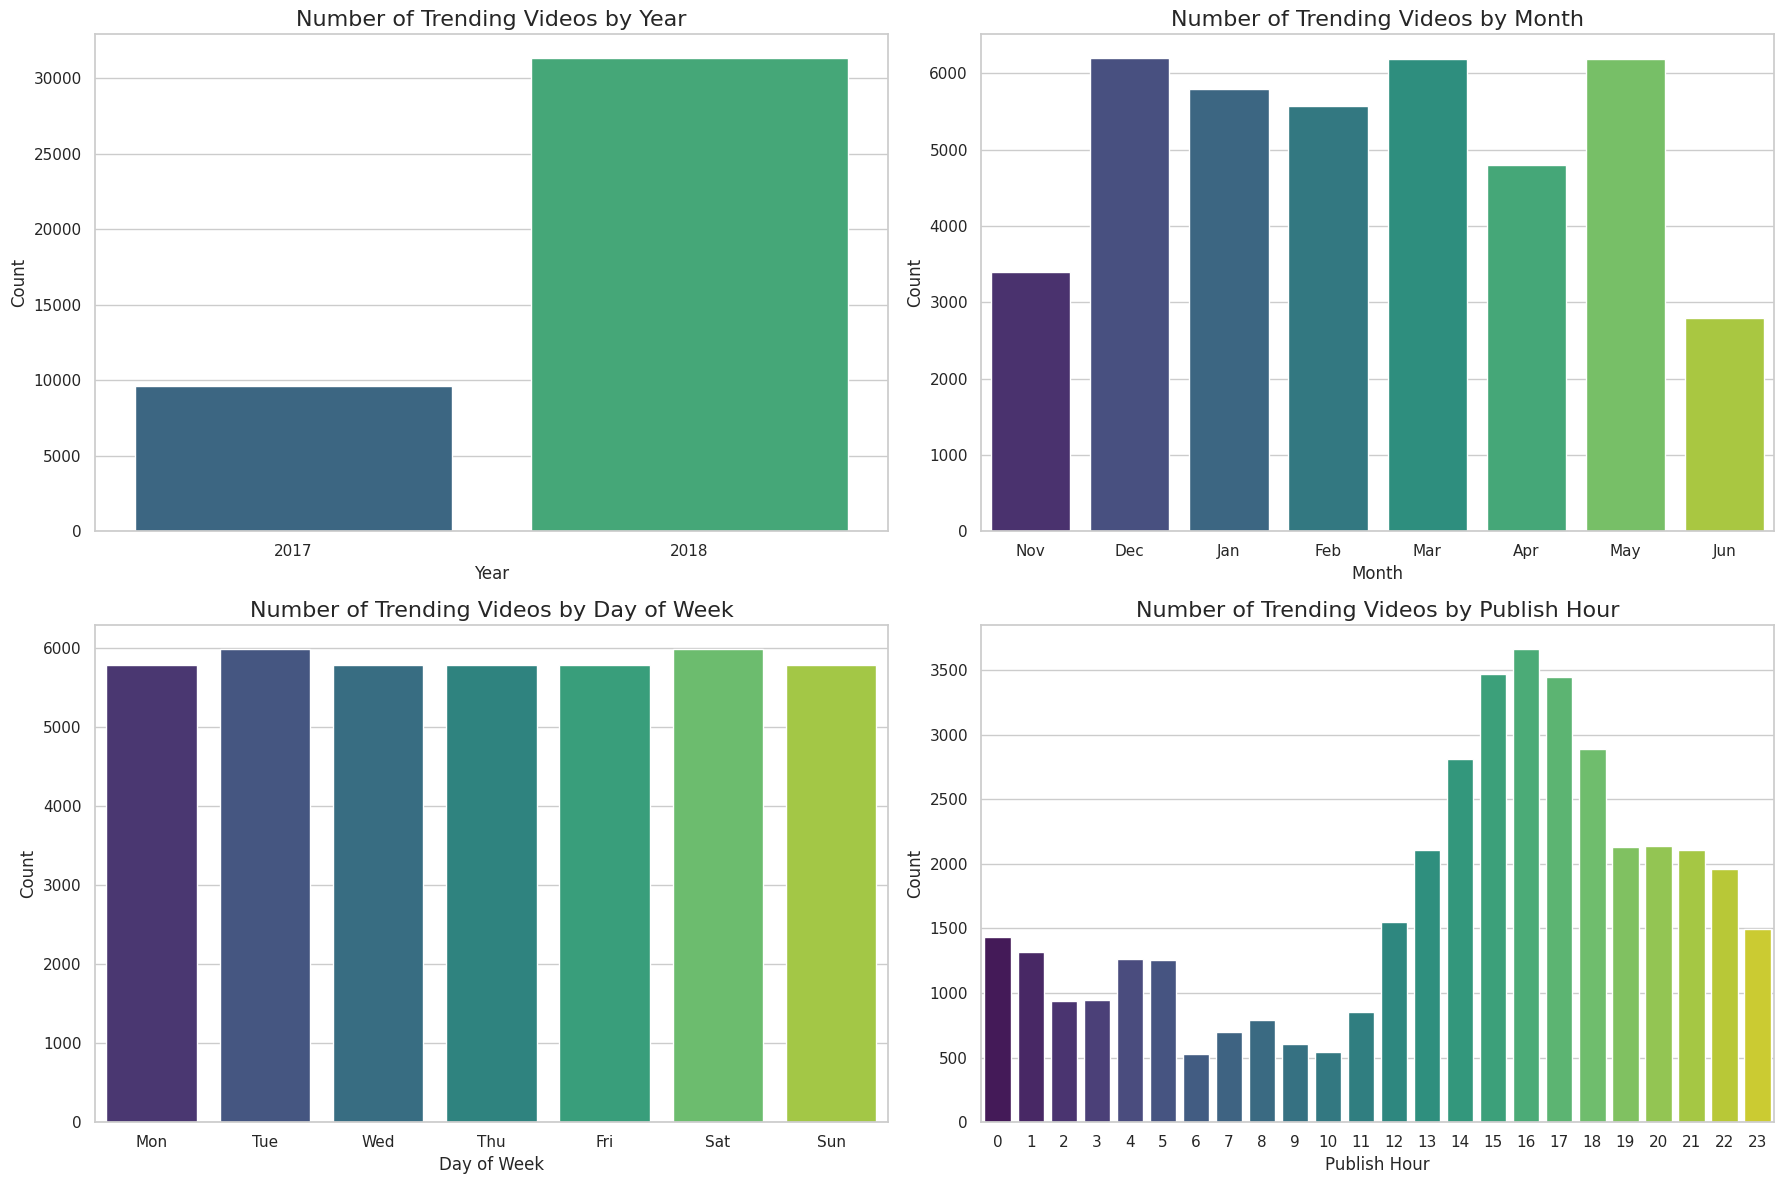

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Count of trending video by year
sns.countplot(data=df, x='trending_year', order=df['trending_year'].value_counts(sort=False).index, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Number of Trending Videos by Year', fontsize=16)
axes[0, 0].set_xlabel('Year', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# Count of trending video by month
month_counts = df['trending_month'].value_counts(sort=False)
sns.countplot(data=df, x='trending_month', order=month_counts.index, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Number of Trending Videos by Month', fontsize=16)
axes[0, 1].set_xlabel('Month', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)
# Map month numbers to names and filter month names to match the months present
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
present_month_names = [month_names[m-1] for m in month_counts.index.tolist()]
axes[0, 1].set_xticks(range(len(month_counts.index)), present_month_names)

# Count of trending video by day of week
sns.countplot(data=df, x='trending_dayofweek', order=range(7), palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Number of Trending Videos by Day of Week', fontsize=16)
axes[1, 0].set_xlabel('Day of Week', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Count of trending video by hour of publish time
sns.countplot(data=df, x='publish_hour', order=range(0, 24), palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Number of Trending Videos by Publish Hour', fontsize=16)
axes[1, 1].set_xlabel('Publish Hour', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-14-710477436>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_cut_counts.index, y=time_cut_counts.values, palette='viridis')


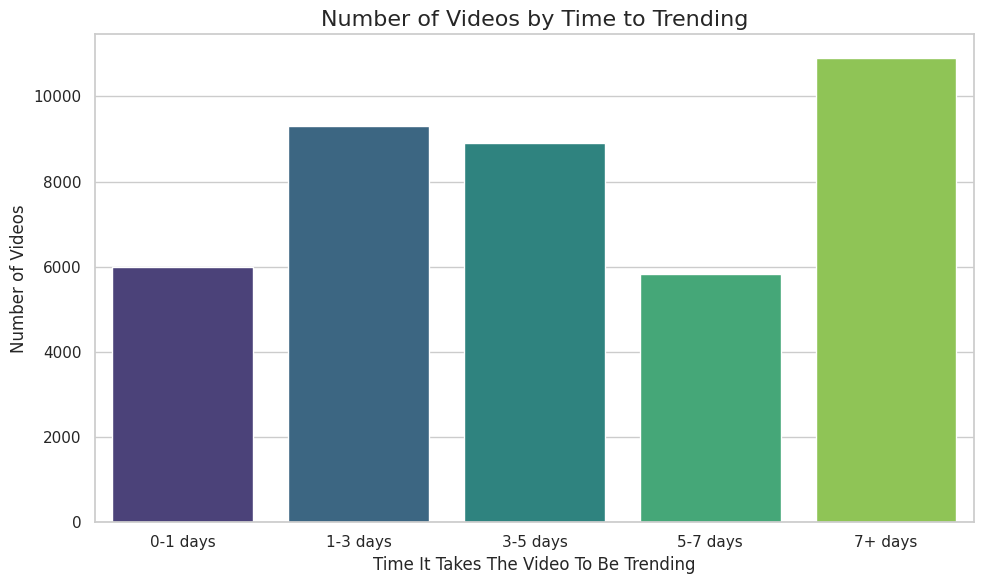

In [14]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Count the number of videos in each 'time_cut' category and plot i
time_cut_counts = df['time_cut'].value_counts(sort=False)
sns.barplot(x=time_cut_counts.index, y=time_cut_counts.values, palette='viridis')
plt.title('Number of Videos by Time to Trending', fontsize=16)
plt.xlabel('Time It Takes The Video To Be Trending', fontsize=12)
plt.ylabel('Number of Videos', fontsize=12)

plt.tight_layout()
plt.show()

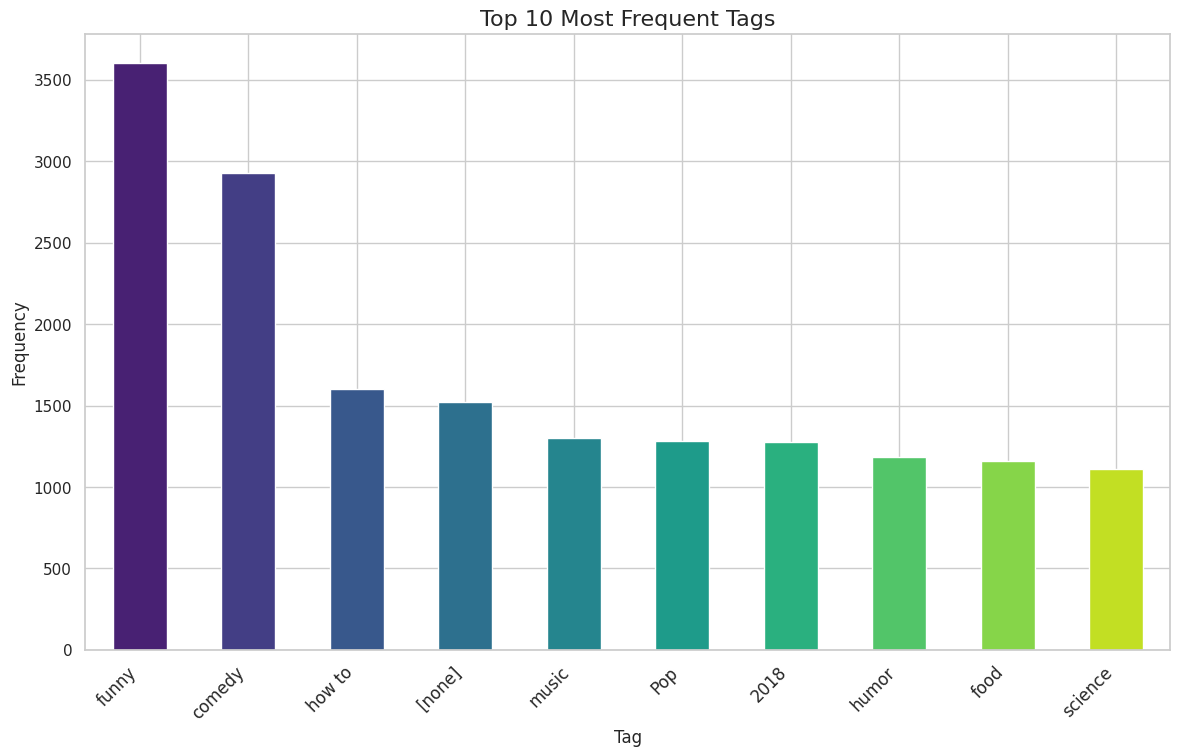

In [11]:
# Extract all tags and flatten the list
all_tags = df['tags'].apply(lambda x: [item.strip('"') for item in x.split('|')])
all_tags_expanded = [item for sublist in all_tags for item in sublist]

# Get the frequency distribution of tags
tag_counts = pd.Series(all_tags_expanded).value_counts()

# Plot the top N most frequent tags
N = 10
plt.figure(figsize=(14, 8))
tag_counts.nlargest(N).plot(kind='bar', color=sns.color_palette('viridis', N))

plt.title(f'Top {N} Most Frequent Tags', fontsize=16)
plt.xlabel('Tag', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()

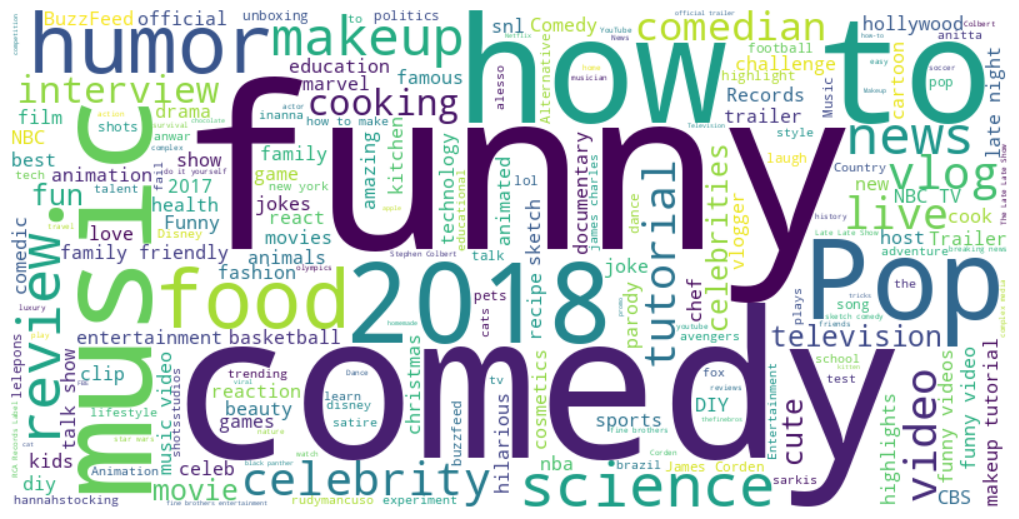

In [12]:
from wordcloud import WordCloud

# Drop videos with no tag, then convert tag_counts df to a dictionary
tag_counts.drop(index='[none]', inplace=True)
tag_counts_dict = tag_counts.to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts_dict)

# Display the generated word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()